# R waarde
https://data.rivm.nl/covid-19/COVID-19_reproductiegetal.json


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

df = pd.read_json("https://data.rivm.nl/covid-19/COVID-19_reproductiegetal.json")
df

,Date,Rt_low,Rt_avg,Rt_up,population,version
0,2020-02-17,0.50,1.93,4.00,hosp,1
1,2020-02-18,0.00,1.74,4.00,hosp,1
2,2020-02-19,0.50,1.59,2.83,hosp,1
3,2020-02-20,0.83,1.74,2.83,hosp,1
4,2020-02-21,0.67,2.03,3.67,hosp,1
...,...,...,...,...,...,...
580,2021-09-19,0.97,NaN,1.13,testpos,1
581,2021-09-20,0.96,NaN,1.18,testpos,1
582,2021-09-21,0.94,NaN,1.25,testpos,1
583,2021-09-22,0.93,NaN,1.32,testpos,1


In [2]:
df.head()

,Date,Rt_low,Rt_avg,Rt_up,population,version
0,2020-02-17,0.50,1.93,4.00,hosp,1
1,2020-02-18,0.00,1.74,4.00,hosp,1
2,2020-02-19,0.50,1.59,2.83,hosp,1
3,2020-02-20,0.83,1.74,2.83,hosp,1
4,2020-02-21,0.67,2.03,3.67,hosp,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        585 non-null    datetime64[ns]
 1   Rt_low      585 non-null    float64       
 2   Rt_avg      571 non-null    float64       
 3   Rt_up       585 non-null    float64       
 4   population  585 non-null    object        
 5   version     585 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 27.5+ KB


In [4]:
df.describe()

,Rt_low,Rt_avg,Rt_up,version
count,585.000000,571.000000,585.000000,585.0
mean,0.910205,1.045692,1.207248,1.0
std,0.343988,0.317675,0.512125,0.0
min,0.000000,0.480000,0.720000,1.0
25%,0.790000,0.860000,0.950000,1.0
50%,0.930000,0.980000,1.050000,1.0
75%,1.060000,1.140000,1.250000,1.0
max,2.900000,2.990000,5.000000,1.0


In [5]:
df["Rt_avg"].mean()

1.04569176882662

In [6]:
df['month_year'] = df['Date'].dt.to_period('M')
df.head()

,Date,Rt_low,Rt_avg,Rt_up,population,version,month_year
0,2020-02-17,0.50,1.93,4.00,hosp,1,2020-02
1,2020-02-18,0.00,1.74,4.00,hosp,1,2020-02
2,2020-02-19,0.50,1.59,2.83,hosp,1,2020-02
3,2020-02-20,0.83,1.74,2.83,hosp,1,2020-02
4,2020-02-21,0.67,2.03,3.67,hosp,1,2020-02


<AxesSubplot:xlabel='Date'>

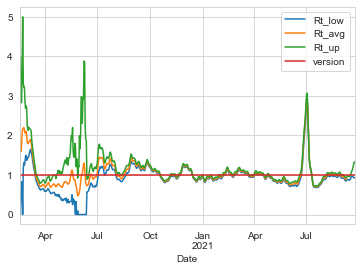

In [8]:
df.groupby(["Date"]).mean().plot()

<AxesSubplot:xlabel='month_year'>

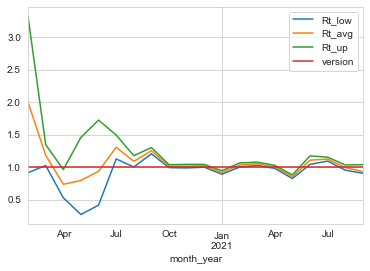

In [9]:
df.groupby(["month_year"]).mean().plot()

In [10]:
# df21 = df[df["Date"] > "2021-01-01"]
df21 = df.loc[df["Date"] > "2021-01-01", ["Date","Rt_low","Rt_avg","Rt_up"]]
df21.head()

,Date,Rt_low,Rt_avg,Rt_up
320,2021-01-02,0.91,0.94,0.96
321,2021-01-03,0.86,0.88,0.90
322,2021-01-04,0.82,0.84,0.86
323,2021-01-05,0.81,0.84,0.86
324,2021-01-06,0.83,0.85,0.88


In [11]:
df21.set_index("Date",drop=True,inplace=True)
df21.head()

,Rt_low,Rt_avg,Rt_up
Date,,,
2021-01-02,0.91,0.94,0.96
2021-01-03,0.86,0.88,0.90
2021-01-04,0.82,0.84,0.86
2021-01-05,0.81,0.84,0.86
2021-01-06,0.83,0.85,0.88


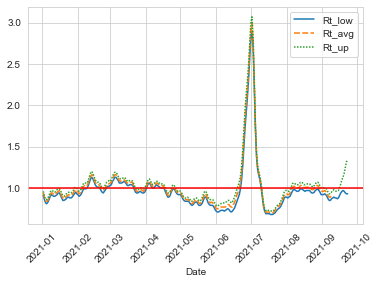

In [12]:
# import matplotlib.dates as mdates

sns.lineplot(data=df21)
#fig.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.axhline(y=1.0, color='r', linestyle='-')
plt.xticks(rotation=45)
plt.show()

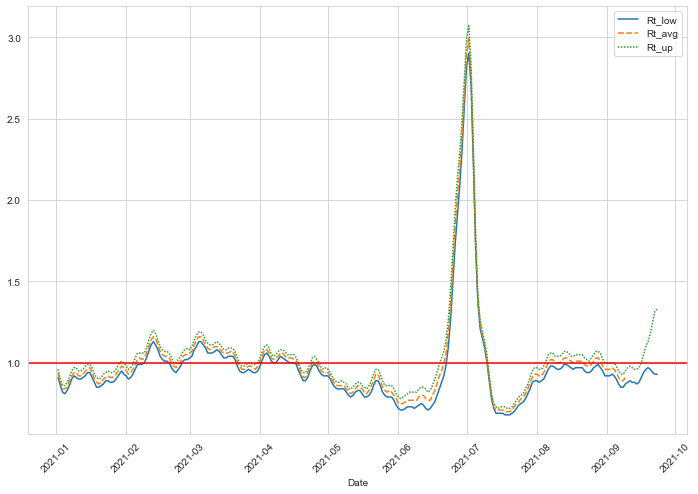

In [13]:
def cm2inch(value):
    return value/2.54

plt.figure(figsize=(cm2inch(30), cm2inch(20)))
sns.lineplot(data=df21)
plt.axhline(y=1.0, color='r', linestyle='-')
plt.xticks(rotation=45)
plt.show()


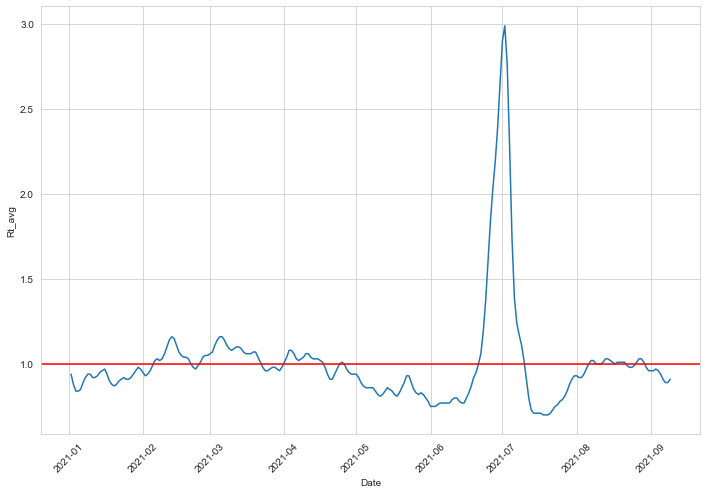

In [14]:
def cm2inch(value):
    return value/2.54

plt.figure(figsize=(cm2inch(30), cm2inch(20)))
sns.lineplot(data=df21["Rt_avg"])
plt.axhline(y=1.0, color='r', linestyle='-')
plt.xticks(rotation=45)
plt.show()
